# Introduction




# Prepare for analysis

## Load packages

In [48]:
import sys, os
sys.path.append(os.path.abspath('.'))
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud, STOPWORDS
color_list = ["#A5D7E8", "#19376D", "#0b2447"]

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score

from titanic import load_data, clean_data, analysis, model


In [49]:
#TODO: Add all hard coded parameters like file paths or model parameters here

from titanic import config

config.TRAIN_PATH, config.TEST_PATH


('data/train.csv', 'data/test.csv')

## Read the data

In [50]:
from titanic.load_data import load_train_data, load_test_data

train_raw = load_train_data(config.TRAIN_PATH)
test_raw  = load_test_data(config.TEST_PATH)


Loaded training data: 891 rows × 12 columns
Loaded test data: 418 rows × 11 columns


# Preliminary data inspection

## Quick glimpse of the data
TODO: Think if you can abstract away much here.

In [51]:
train_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
test_raw.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [53]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [54]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [55]:
train_raw.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [56]:
test_raw.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Few statistics on the data

### Missing data

In [57]:
from titanic.clean_data import (
    summarise_missing,
    summarise_frequent,
    summarise_uniques,
    clean_titanic_data
)

summarise_missing(train_raw)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,0,0,0,0,0,177,0,0,0,0,687,2
Percent,0.0,0.0,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,0.0,77.104377,0.224467
Type,int64,int64,int64,object,object,float64,int64,int64,object,float64,object,object


### Most frequent data

In [58]:
summarise_frequent(train_raw)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Most frequent item,1,0,3,"Braund, Mr. Owen Harris",male,24.0,0,0,347082,8.05,B96 B98,S
Frequency,1,549,491,1,577,30,608,678,7,43,4,644
Percent from total,0.112,61.616,55.107,0.112,64.759,4.202,68.238,76.094,0.786,4.826,1.961,72.441


In [59]:
summarise_frequent(test_raw)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Most frequent item,892,3,"Kelly, Mr. James",male,21.0,0,0,PC 17608,7.75,B57 B59 B63 B66,S
Frequency,1,218,1,266,17,283,324,5,21,3,270
Percent from total,0.239,52.153,0.239,63.636,5.12,67.703,77.512,1.196,5.036,3.297,64.593


### Unique values

In [60]:
summarise_uniques(train_raw)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,891,891,891,891,891,714,891,891,891,891,204,889
Uniques,891,2,3,891,2,88,7,7,681,248,147,3


In [61]:
summarise_uniques(test_raw)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,418,418,418,418,332,418,418,418,417,91,418
Uniques,418,3,418,2,79,7,8,363,169,76,3


### Clean Datasets

In [62]:
train_df = clean_titanic_data(train_raw)
test_df = clean_titanic_data(test_raw)

# Exploratory data analysis

## Univariate analysis for all features


We show here two graphs in paralel:
* distribution of class values, split per Survived value
* comparison of class values, in train and test data


Let's first aggregate train and test data into one single dataframe, `all_df`.

In [63]:
from titanic.analysis import combine_train_test

all_df = combine_train_test(train_df, test_df)  

In [64]:
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,set
0,0.0,3,0,22.0,1,0,7.2500,False,True,train
1,1.0,1,1,38.0,1,0,71.2833,False,False,train
2,1.0,3,1,26.0,0,0,7.9250,False,True,train
3,1.0,1,1,35.0,1,0,53.1000,False,True,train
4,0.0,3,0,35.0,0,0,8.0500,False,True,train


/var/folders/vp/yyx4dkxd4yx0_bbgs0hp31vh0000gn/T/ipykernel_98739/3098234160.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x="Sex", data=all_df, hue="set", palette= color_list)


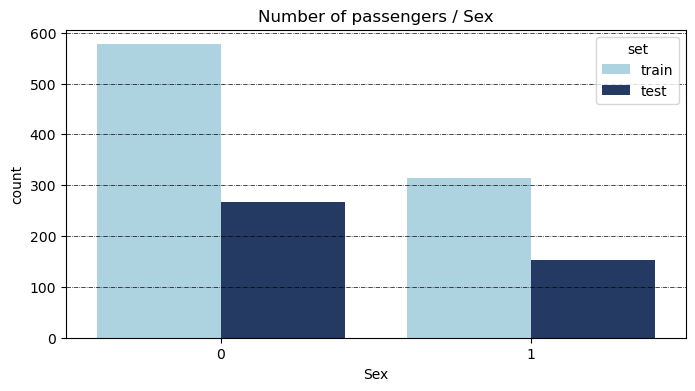

In [65]:
# Plot count pairs "Sex"
f, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.countplot(x="Sex", data=all_df, hue="set", palette= color_list)
plt.grid(color="black", linestyle="-.", linewidth=0.5, axis="y", which="major")
ax.set_title("Number of passengers / Sex")
plt.show()  

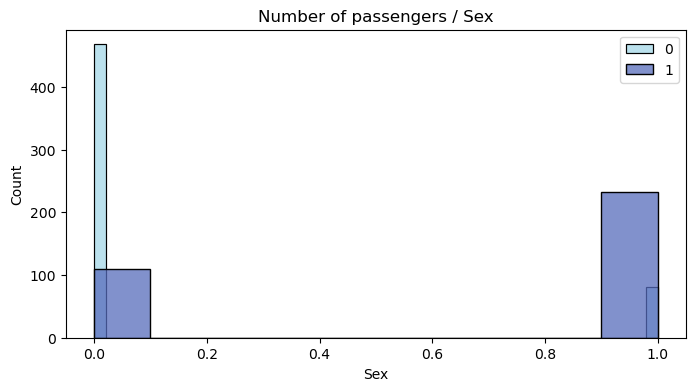

In [66]:
# Plot distribution pairs for "Sex" and hue as "Survived"
color_list = ["#A5D7E8", "#576CBC", "#19376D", "#0b2447"]
f, ax = plt.subplots(1, 1, figsize=(8, 4))
for i, h in enumerate(train_df["Survived"].unique()):
    g = sns.histplot(train_df.loc[train_df["Survived"]==h, "Sex"], 
                                  color=color_list[i], 
                                  ax=ax, 
                                  label=h)
ax.set_title("Number of passengers / Sex")
g.legend()
plt.show()

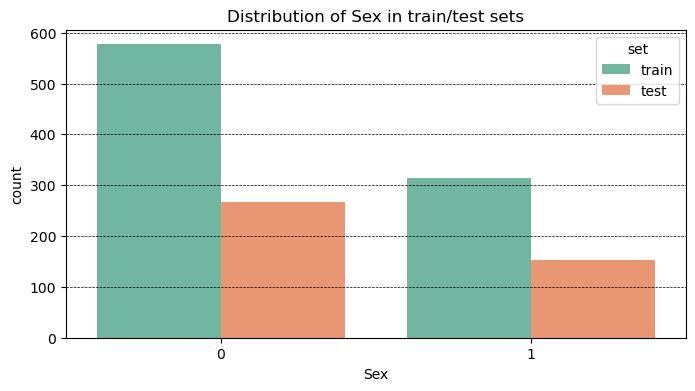

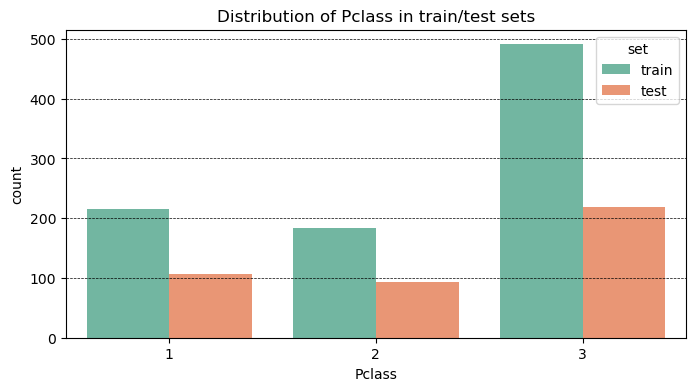

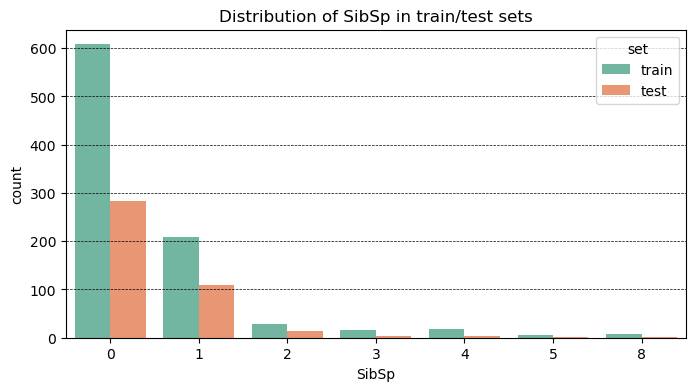

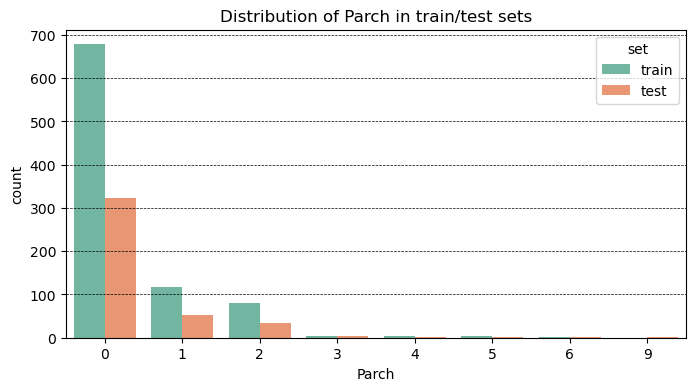

In [67]:
# Plot count pairs using all_df for the columns: Sex, Pclasss, SibSp, Parch
from titanic.analysis import plot_univariate_categorical

plot_univariate_categorical(all_df, ["Sex", "Pclass", "SibSp", "Parch"])

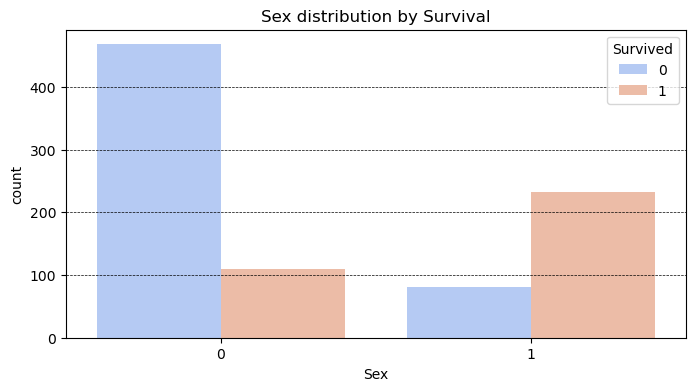

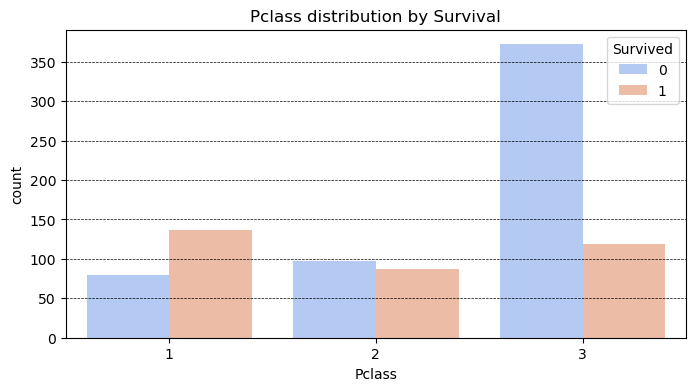

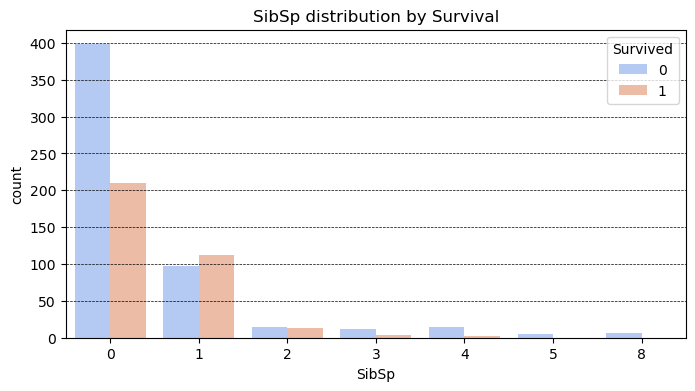

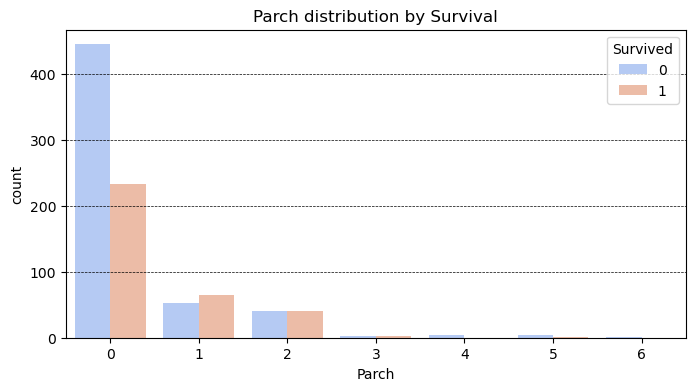

In [68]:
# Plot count pairs using all_df for the columns: Sex, Pclasss, SibSp, Parch and use "Survived" as hue.
from titanic.analysis import plot_univariate_by_survival    

plot_univariate_by_survival(train_df, ["Sex", "Pclass", "SibSp", "Parch"])

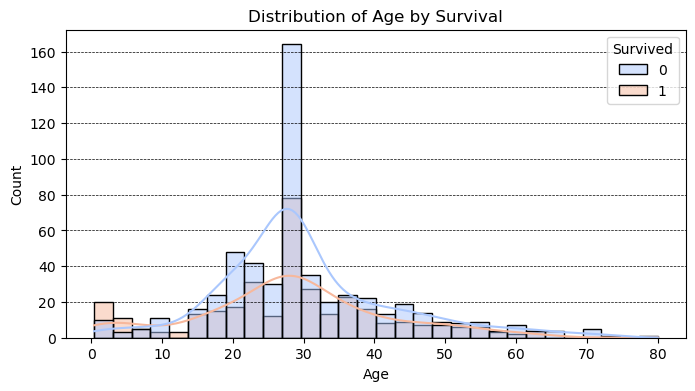

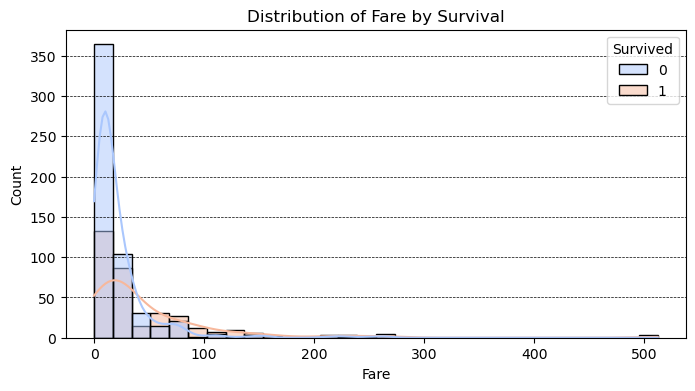

In [69]:
# Plot distribution pairs for Age and Fare using "Survived" as hue
from titanic.analysis import plot_numeric_distributions

plot_numeric_distributions(train_df, ["Age", "Fare"])

## Family size


Based on SibSp (sibilings or spouse) and Parch (parents or children), we set the Family Size field.

In [70]:
from titanic.analysis import add_family_size

all_df = add_family_size(all_df)

In [71]:
train_df = add_family_size(train_df)


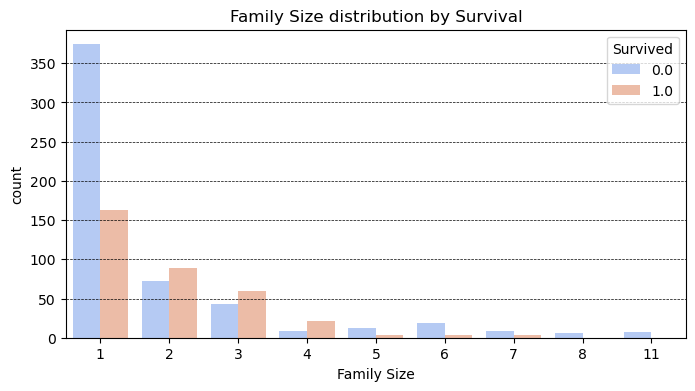

In [72]:
# Plot count pairs using all_df for the column "Family Size" and use "Survived" as hue.

plot_univariate_by_survival(all_df, ["Family Size"])

## Age interval

In [73]:
from titanic.analysis import add_age_interval
all_df = add_age_interval(all_df)


In [74]:
train_df = add_age_interval(train_df)

In [75]:
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,set,Family Size,Age Interval
0,0.0,3,0,22.0,1,0,7.2500,False,True,train,2,1
1,1.0,1,1,38.0,1,0,71.2833,False,False,train,2,2
2,1.0,3,1,26.0,0,0,7.9250,False,True,train,1,1
3,1.0,1,1,35.0,1,0,53.1000,False,True,train,2,2
4,0.0,3,0,35.0,0,0,8.0500,False,True,train,1,2


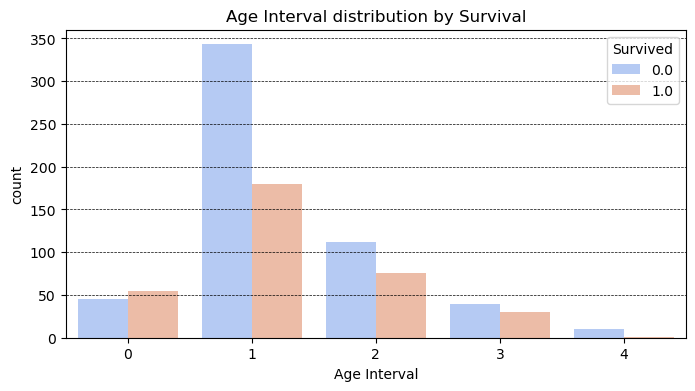

In [76]:
# Plot count pairs using all_df for the column "Age Interval" and use "Survived" as hue.
plot_univariate_by_survival(all_df, ["Age Interval"])   

## Fare interval

In [77]:
from titanic.analysis import add_fare_interval

all_df = add_fare_interval(all_df)
train_df = add_fare_interval(train_df)

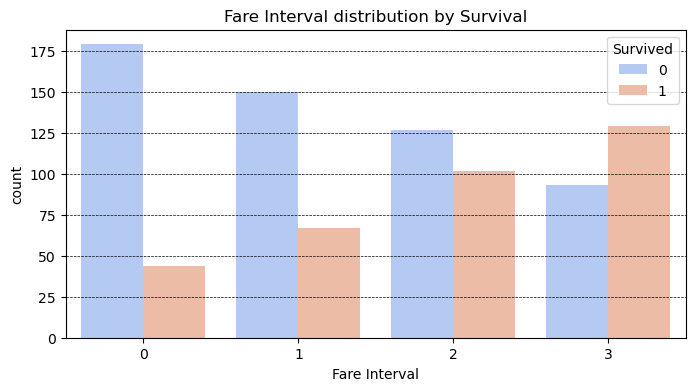

In [78]:
# Plot count pairs using train_df for the column "Fare Interval"
plot_univariate_by_survival(train_df, ["Fare Interval"])

Let's create a composed feature: Pclass + Sex.

In [79]:
from titanic.analysis import add_sex_pclass
all_df = add_sex_pclass(all_df)
train_df = add_sex_pclass(train_df) 

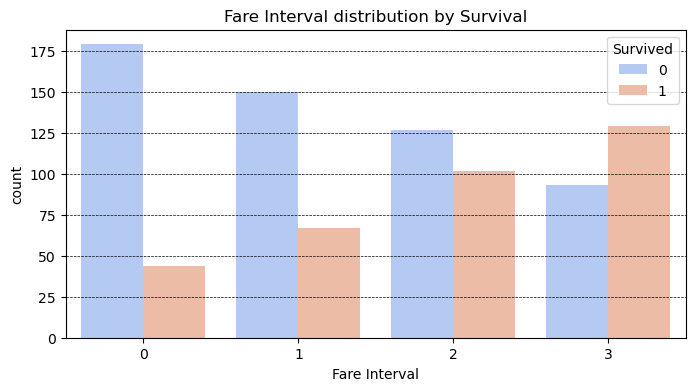

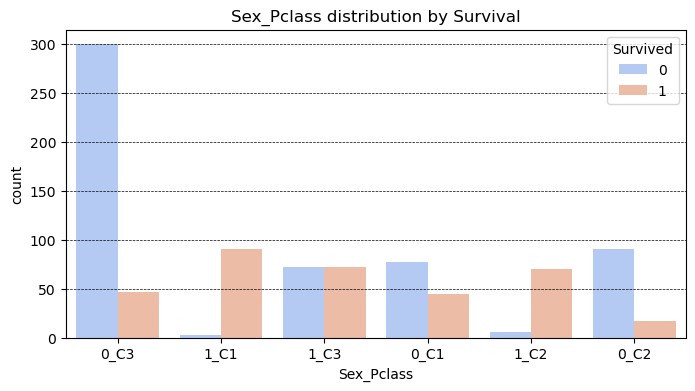

In [80]:
# Plot count pairs using train_df for the column "Fare Interval" and "Fare (grouped by survival)" with "Survived" as hue
plot_univariate_by_survival(train_df, ["Fare Interval", "Sex_Pclass"])

## Process names


When we process names, we would like to extract the following information:

- Family name - this is the first word (or few first words, if a family name with multiple names), followed by a comma  
- Title - this follows just after the comma   
- Given name - this is the word or group of words following family name  
- Maiden name - for ladies, is given between parantheses  

We start with creating a function that parses the Name string and extract (if possible) these 4 elements


In [81]:
from titanic.names import apply_name_parsing 

In [82]:
train_raw = apply_name_parsing(train_raw)
test_raw  = apply_name_parsing(test_raw)


In [83]:
train_raw[["Family Name", "Title", "Given Name", "Maiden Name"]].head()

,Family Name,Title,Given Name,Maiden Name
0,Braund,Mr.,Owen Harris,None
1,Cumings,Mrs.,John Bradley,Florence Briggs Thayer
2,Heikkinen,Miss.,Laina,None
3,Futrelle,Mrs.,Jacques Heath,Lily May Peel
4,Allen,Mr.,William Henry,None


## Multivariate analysis


Let's look now to the interaction of multiple features.

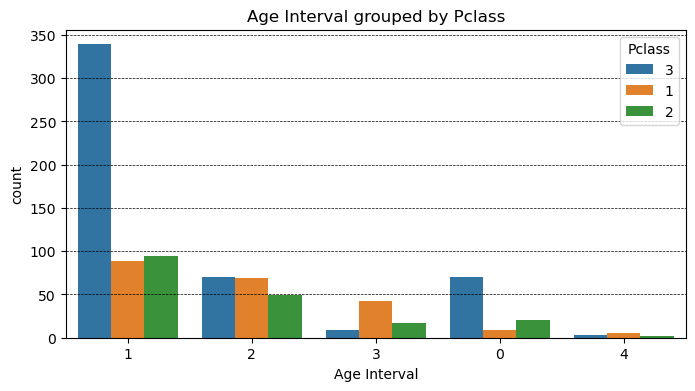

In [84]:
from titanic.analysis import plot_count_grouped

plot_count_grouped(train_df, "Age Interval", "Pclass")

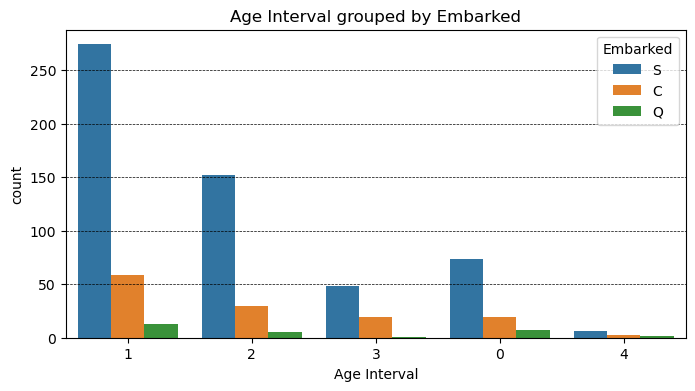

In [85]:
tmp = add_age_interval(train_raw.copy())  # must be the pre-clean DataFrame
plot_count_grouped(tmp, "Age Interval", "Embarked")


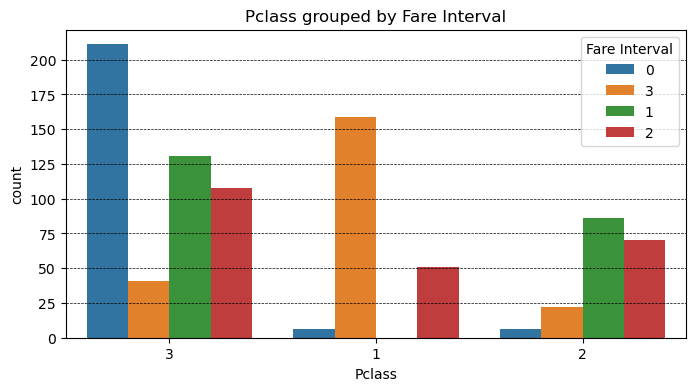

In [86]:
plot_count_grouped(train_df, "Pclass", "Fare Interval")

### Few more engineered data 


Let's create one more engineered feature:  
* Family size interval: Single, Small, Large  

In [87]:
from titanic.analysis import add_family_type

all_df = add_family_type(all_df)
train_df = add_family_type(train_df)

# Baseline model

## Feature engineering: Map categorical value to numerical values

In [88]:
from titanic.model import encode_sex

train_df = encode_sex(train_df)
test_df = encode_sex(test_df)


Create train-validation split.

In [89]:
VALID_SIZE = 0.2
train, valid = train_test_split(train_df, test_size=VALID_SIZE, random_state=42, shuffle=True)

Define predictor features and target feature.

In [90]:
predictors = ["Sex", "Pclass"]
target = 'Survived'

Define the training and validation data and labels.

In [91]:
from titanic.model import make_train_valid_xy

train_X, train_Y, valid_X, valid_Y = make_train_valid_xy(train, valid, predictors, target)


Initialize the classifiction algorithm, fit the classifier with the training data, predict the train data, and predict the validation data.

In [92]:
from titanic.model import fit_rf_and_predict
clf, preds_tr, preds = fit_rf_and_predict(train_X, train_Y, valid_X)


# Evaluation

## Classification report for training data.

In [93]:
from titanic.model import evaluate_classification

evaluate_classification(train_Y, preds_tr, valid_Y, preds)


=== Classification report: TRAIN ===
              precision    recall  f1-score   support

Not Survived       0.69      0.86      0.77       444
    Survived       0.61      0.37      0.46       268

    accuracy                           0.67       712
   macro avg       0.65      0.61      0.61       712
weighted avg       0.66      0.67      0.65       712


=== Classification report: VALIDATION ===
              precision    recall  f1-score   support

Not Survived       0.71      0.85      0.77       105
    Survived       0.70      0.50      0.58        74

    accuracy                           0.70       179
   macro avg       0.70      0.67      0.68       179
weighted avg       0.70      0.70      0.69       179



## Test-set Prediction & Submission (Extra)

**Goal.** Produce a Kaggle-ready CSV using our baseline Random Forest.

**Method.** Reuse the trained `clf` and the same `predictors` used for validation.  
We generate class predictions on `test_df` and export `PassengerId, Survived` to `submissions/rf_baseline.csv`.

**Why now?** This closes the loop from EDA → features → baseline model → *actionable output*.

**Caveats.**
- No probability calibration or threshold tuning yet.
- Features must match training exactly (same preprocessing & dtypes).
- This is a baseline; expect improvements from better features/CV.


In [94]:
from titanic.model import predict_and_export

submission = predict_and_export(
    clf,
    test_df,
    predictors,
    out_path="submissions/rf_baseline.csv",
    id_series=test_raw["PassengerId"]  # <- raw test with IDs
)
submission.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


### Compare model output with Kaggle baseline (gender_submission.csv)

As a final verification step, we compare our model’s predicted labels (`rf_baseline.csv`)
with the official Kaggle benchmark labels (`gender_submission.csv`).

This provides a quick measure of how our baseline Random Forest performs relative to the
default gender-based heuristic (which predicts all females survived and all males did not).
We compute overall accuracy, confusion matrix, and a full classification report.


In [95]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load both CSVs
baseline = pd.read_csv("submissions/rf_baseline.csv")
ground_truth = pd.read_csv("data/gender_submission.csv")

# Merge on PassengerId to ensure alignment
merged = pd.merge(ground_truth, baseline, on="PassengerId", suffixes=("_true", "_pred"))

# Evaluate performance
acc = accuracy_score(merged["Survived_true"], merged["Survived_pred"])
cm = confusion_matrix(merged["Survived_true"], merged["Survived_pred"])
report = classification_report(merged["Survived_true"], merged["Survived_pred"], target_names=["Not Survived", "Survived"])

print(f"✅ Model vs. gender_submission.csv accuracy: {acc:.4f}\n")
print("Confusion matrix:\n", cm)
print("\nClassification report:\n", report)

✅ Model vs. gender_submission.csv accuracy: 0.6196

Confusion matrix:
 [[209  57]
 [102  50]]

Classification report:
               precision    recall  f1-score   support

Not Survived       0.67      0.79      0.72       266
    Survived       0.47      0.33      0.39       152

    accuracy                           0.62       418
   macro avg       0.57      0.56      0.56       418
weighted avg       0.60      0.62      0.60       418

